In [1]:
!pip install tensorflow

In [2]:
!python -m pip install --upgrade pip


In [4]:
!pip --version

pip 24.2 from C:\Users\ADMIN\week4\week4\Lib\site-packages\pip (python 3.11)



In [5]:
!pip install matplotlib

In [62]:
import tensorflow as tf

print(tf.__version__)


2.17.0


In [63]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [164]:
BATCH_SIZE = 4
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=25

In [165]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Euca_dataset2",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 100 files belonging to 5 classes.


In [166]:
class_names = dataset.class_names
class_names

['Euca_burned', 'Euca_curly', 'Euca_dotted', 'Euca_healthy', 'Euca_yellow']

In [167]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(4, 256, 256, 3)
[1 4 2 0]


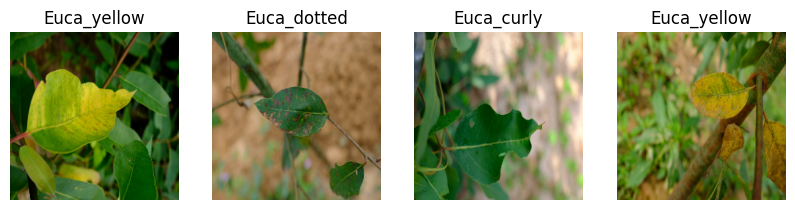

In [169]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(4):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [170]:
len(dataset)

25

In [171]:
train_size = 0.8
len(dataset)*train_size

20.0

In [172]:
train_ds = dataset.take(20)
len(train_ds)

20

In [173]:
test_ds = dataset.skip(20)
len(test_ds)

5

In [174]:
val_size=0.1
len(dataset)*val_size

2.5

In [175]:
val_ds = test_ds.take(2)
len(val_ds)

2

In [176]:
test_ds = test_ds.skip(2)
len(test_ds)

3

In [182]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [183]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [184]:
len(train_ds)

20

In [185]:
len(val_ds)

2

In [186]:
len(test_ds)

3

In [82]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [28]:
!pip install keras

In [187]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),  
    layers.Rescaling(1./255)  # Normalize ค่า pixel ให้เป็น 0-1
])

In [189]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
])

In [191]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes=5
model = models.Sequential([
    
    resize_and_rescale,  #Normalize
    data_augmentation,
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same',input_shape=input_shape),  # เลเยอร์ Conv2D แรก
    layers.MaxPooling2D((2, 2)),  # เลเยอร์ MaxPooling
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),  # เลเยอร์ Conv2D ที่สอง
    layers.MaxPooling2D((2, 2)),  # เลเยอร์ MaxPooling
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),  # เลเยอร์ Conv2D ที่สาม
    layers.MaxPooling2D((2, 2)),  # เลเยอร์ MaxPooling

    layers.Flatten(),  # แปลงข้อมูลจาก 2D เป็น 1D
    layers.Flatten(),  # แปลงข้อมูลจาก 2D เป็น 1D
    layers.Dense(64, activation='relu'),  # เลเยอร์ Dense แรก
    layers.Dense(n_classes, activation='softmax'),  # เลเยอร์ Dense สุดท้าย
])

model.build(input_shape=input_shape)

model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_11 (Sequential)           │ (4, 256, 256, 3)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_12 (Sequential)           │ (4, 256, 256, 3)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (4, 256, 256, 32)           │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (4, 128, 128, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (4, 128, 128, 64)           │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (4, 64, 64, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (4, 64, 64, 64)             │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (4, 32, 32, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (4, 65536)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (4, 65536)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (4, 64)                     │       4,194,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (4, 5)                      │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,251,013 (16.22 MB)

 Trainable params: 4,251,013 (16.22 MB)

 Non-trainable params: 0 (0.00 B)

In [192]:
model.compile(
    optimizer='Adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [193]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - accuracy: 0.2352 - loss: 2.1186 - val_accuracy: 0.1250 - val_loss: 2.2380
Epoch 2/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.2482 - loss: 1.7037 - val_accuracy: 0.5000 - val_loss: 1.5683
Epoch 3/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.3071 - loss: 1.5880 - val_accuracy: 0.2500 - val_loss: 1.5994
Epoch 4/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - accuracy: 0.4206 - loss: 1.4275 - val_accuracy: 0.6250 - val_loss: 1.4234
Epoch 5/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.4217 - loss: 1.4326 - val_accuracy: 0.6250 - val_loss: 0.8081
Epoch 6/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.5755 - loss: 1.0943 - val_accuracy: 0.6250 - val_loss: 1.0568
Epoch 7/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.6540 - loss: 0.8371 - val_accuracy: 0.6250 - val_loss: 1.0990
Epoch 8/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.7923 - loss: 0.7517 - val_accuracy: 0.

In [194]:
scores = model.evaluate(test_ds)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 1.0000 - loss: 0.0287


In [195]:
scores

[0.04346747696399689, 1.0]

In [196]:
history

In [197]:
history.params

{'verbose': 1, 'epochs': 25, 'steps': 20}

In [198]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [199]:
type(history.history['loss'])

list

In [200]:
len(history.history['loss'])

25

In [201]:
history.history['loss'][:5] # show loss for first 5 epochs

[1.78473699092865,
 1.6512142419815063,
 1.5651371479034424,
 1.4490020275115967,
 1.3946754932403564]

In [202]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [203]:
################################EPOCHS

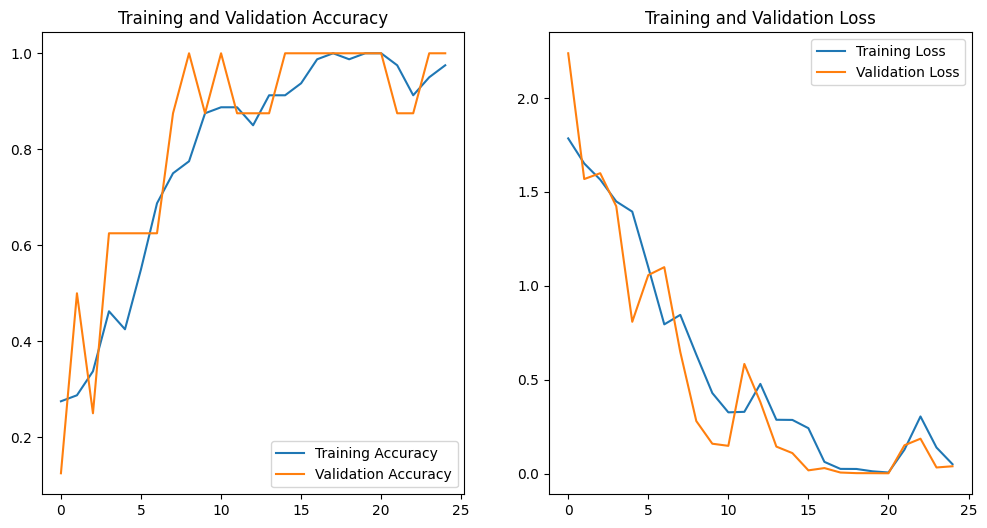

In [205]:
EPOCHS = 25
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Euca_yellow
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
predicted label: Euca_yellow


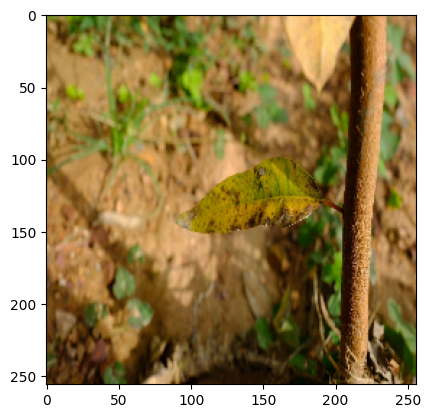

In [212]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [207]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


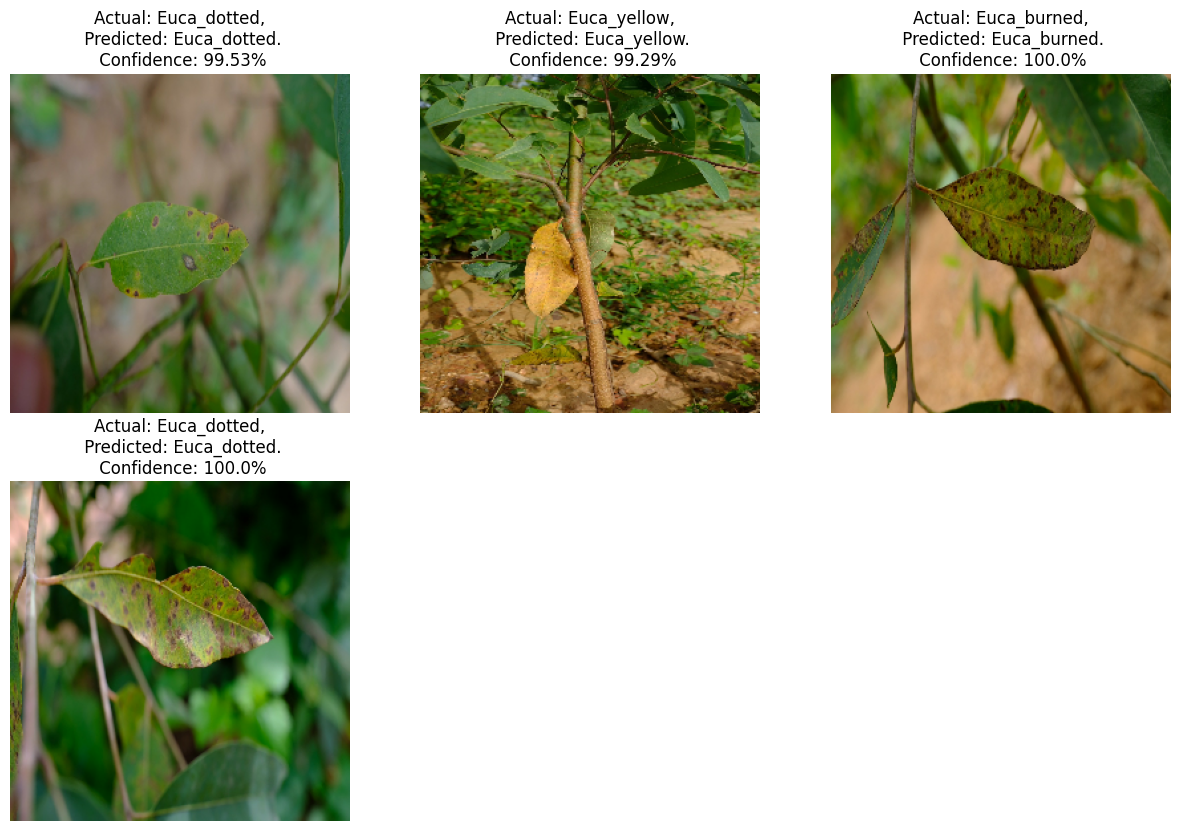

In [215]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(4):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")